## Importing Libraries



In [1]:
# importing my custom module
import allcustommodules as sidra
import Visualization_for_misclassifications as visual
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import cross_val_score

## Loading Data

In [2]:
filename = "../../datasets/vehicles.csv"
dataset = pd.read_csv(filename)
dataset.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


### Exploring Dataset
General shape of data set, attributes list and categories list

In [3]:
sidra.data_stats(dataset)

=========== SOME STATS of Dataset ===========
Shape of the dataset: (846, 19)

List of attribute columns ['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO', 'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO', 'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY', 'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR', 'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR', 'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR', 'HOLLOWS_RATIO', 'Class']


List of Categories  ['van' 'saab' 'bus' 'opel'] 



#### Checking for anomalies and if upsampling of data is required 
Verifying that dataset is homogenous (that is there are almost equal number of datapoints belonging to each category)

In [4]:
dataset.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


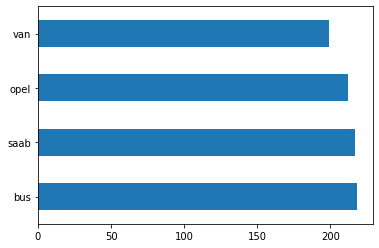

In [5]:
dataset['Class'].value_counts().plot(kind='barh')

## Tokenizing Target Column
Since random forest algo can only predict numbers we are tokenizing Class column/ Target values to numbers.

In [6]:
definitions = sidra.tokenize_target_column(dataset)

Updated tokenize 'Class' column - first 5 values
0    0
1    0
2    1
3    0
4    2
Name: Class, dtype: int64
Distinct Tokens used for converting Class column to integers
Index(['van', 'saab', 'bus', 'opel'], dtype='object')


## Train and Test data split
Now splitting data with 70 percent for training and 30 percent for testing

In [7]:
X_train, X_test, y_train, y_test = sidra.train_data_test_data_split(dataset)

We can do feature scaling here, opting out right now as I don't see any extreme values: https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

## Model Evaluation

Evaluating performance of various classifier:
 Random Forest Classifier, K Neighbor Classifier, RBF SVM, Naive Bayes, Logistic Regression, Decision Tree
 


C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

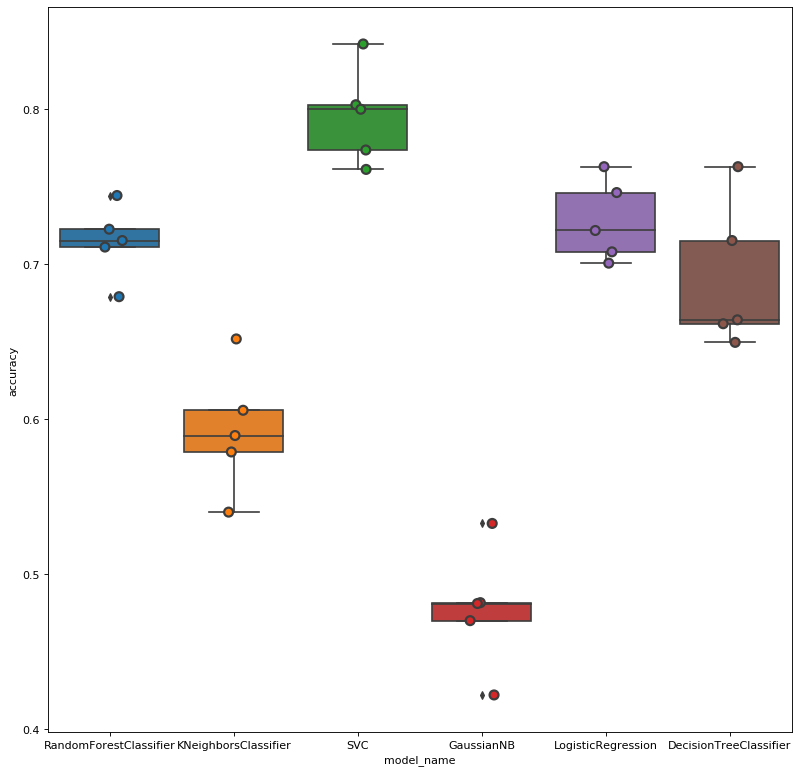

In [8]:
sidra.model_evaluation(X_train, y_train) 


## Training the model


In [9]:
classifier = sidra.train_SVM(X_train, y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Testing Model, checking accuracy and drawing confusion matrix 

In [10]:
y_pred = sidra.test(classifier, X_test)

In [11]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 80.0


Tried with cross validation score got almost 71 percent accuracy which is less than accuracy

In [12]:
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print("Cross validation score:",scores.mean())

Cross validation score: 0.7959883257550129


### Converting numeric target and predict values back to original labels

In [13]:
y_test, y_pred = sidra.untokenizing_testdata_prediction(y_test, y_pred, definitions)

## Visualization of misclassified categories

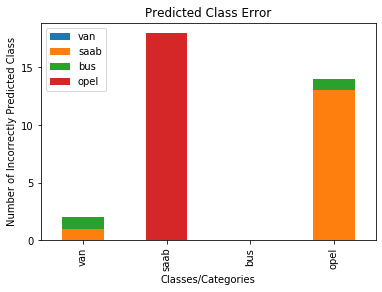

In [14]:
visual.missclassified_data_category_frquency(y_test, y_pred)

============== Summary of evaluation metics ===============
              precision    recall  f1-score   support

         bus       0.96      1.00      0.98        46
        opel       0.59      0.65      0.62        40
        saab       0.64      0.58      0.61        43
         van       1.00      0.95      0.97        41

    accuracy                           0.80       170
   macro avg       0.80      0.80      0.80       170
weighted avg       0.80      0.80      0.80       170

====================== Confusion Matrix=====================


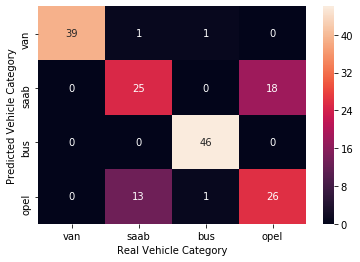

In [15]:
cm = sidra.create_confusion_matrix_class_report(y_test, y_pred)
sidra.create_confusion_matrix_map(cm)
sidra.create_class_report(y_test, y_pred)

### Conclusion:
In the previous version, where I just used Random Forest classifier, the cross validation score was almost 70 and accuracy was 78, but after comparative evaluation of different models, I found RBF SVM performs better and gives good accuracy and cross vlaidation score which is 80 percent